# Bayesian Inference for Proportions

<div class="alert alert-block alert-warning">
<b> Intended learning objectives:</b> 
    
By the end of this session you will be able to:

Understand and apply the basic principles of Bayesian analysis using proportions, specifically: 

* Use the beta distribution as a prior and derive the posterior distribution  
* Obtain credible HPD intervals for the parameter    
* Obtain prior and posterior predictive distributions  
* Understand the concept of conjugate priors  

</div>

In the previous section, we looked at Bayes theorem in the discrete case. We turn to the more general case of Bayes thorem to make inference about an unknown parameter $\theta$, which could be discrete or continuous. The probability distribution for $\theta$ reflects our uncertainty about it before seeing the data, *prior distribution*, $p(\theta)$. Once the data data $y$ is known, we condition on it. Using Bayes theorem we obtain a conditional probability distribution for unobserved quantities of interest given the data. If $\theta$ is continuous, we have:

\begin{equation}
p(\theta \mid y)= \frac{ p(\theta)\, p(y \mid \theta)}{\int  p(\theta)\,p(y \mid \theta)\,d\theta},
\end{equation}

and $\theta$ is discrete and takes values in the set $\Theta$, we have: 


\begin{equation}
p(\theta \mid y)= \frac{ p(\theta)\, p(y \mid \theta)}{\sum_{\theta \in \Theta}  p(\theta) p(y \mid \theta) }.
\end{equation}


We call $p(\theta \mid y)$ the *posterior distribution*. 

Note that the Bayesian approach is naturally synthetic in that it allows data from different sources to be combined, according to Bayes principles. This approach is most useful when there is informative prior information. We note that the Bayesian approach can be recursive, so $p(\theta \mid y)$ may be used as a prior when calculating $p(\theta \mid y, z)$ for a second data set $z$. 

The denominator, ${\int  p(\theta)\,p(y \mid \theta)\,d\theta}$ or $\sum_{\theta \in \Theta}  p(\theta) p(y \mid \theta)$, is a constant with respect to $\theta$. One of the challenges of using Bayesian approaches is that the integration can be analytically intractable, so that numerical methods are needed (for example, numerical integration or Markov Chain Monte Carlo methods). You can learn more about this in the Bayesian module in the second semester, if you choose to take it. In this introductory course, we will only look at examples where this constant need not be calculated, since the form of the posterior can be inferred by inspection once observing that the posterior is proportional to the product of the prior and likelihood: 

$$p(\theta \mid y) \propto p(\theta)\,p(y \mid \theta).$$

We will see how this works for the inference of proportions. 

## Bayesian inference on proportions

Consider a new drug being developed for the relief of chronic pain. To find out about its efficacy, we propose to run a single-arm early-phase clinical trial in which we give this drug to a number $n$ of randomly selected patients. Because patients are independent of each other, so it seems reasonable to model the data using the Binomial distribution, $Y\sim Bin(n,\theta).$ We have that $\theta\in [0,1]$ is the probability of pain relief (success) in each patient, and this is unknown. We then make the observation that there are $y$ successes out of $n$ independent trials. As a reminder, the probability distribution function of the Binomial distribution is:  

\begin{equation}
p \left(y \mid \theta \right) = {n \choose y} \theta^y (1-\theta)^{n-y}.
\end{equation}

To proceed, we need to have a prior distribution for $\theta$. Let us consider three possible prior distributions: 

1. An uninformative prior, where all values of $\theta$ are equally probable.   
   You essentially have no prior information about the effectiveness of the drug.   
2. A symmetrical, concave prior that is centered at 0.5.   
   You think that the drug is likely to be effective for patients around half of the time.      
3. An asymmetrical prior with a spike at 0.1.     
   You think that the drug is generally ineffective, and feel quite strongly about it.   

Now, the Beta distribution is a flexible distribution that can represent each of these prior beliefs by appropriate choice of its parameters. It is also convenient because it has a similar form to the Binomial distribution. 

### The Beta prior 


The Beta distribution is a flexible two parameter distribution that is restricted to the interval between 0 and 1, and so it is a reasonable form for a probability distribution for a proportion. The two parameters, $a$ and $b$, are often called  "shape" parameters. Given $\theta \sim \hbox{Beta}(a,b)$, the probability density function, expectation and variance of the distribution are as follows: 

\begin{eqnarray}
p(\theta|a, b) & = & \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \,\,
\theta^{a-1} \; (1-\theta)^{b-1}  \mbox{  where  } \theta \in (0,1) \label{eqn.beta1}\\
{E}( \theta |a, b) &= &   \frac{a}{a+ b }     \label{eqn.beta2}\\
{Var}( \theta |a, b) &= &   \frac{a b}{ (a+ b)^2 (a+ b+1)} \label{eqn.beta3}
\end{eqnarray}

The *Gamma function* $\Gamma(x)$ is defined for positive integers as $\Gamma (x)=(x-1)!$, and has a more complex form for real numbers.    

This prior distribution is very flexible. For example: 

1. $a=1, b=1$ results in the uniform distribution
2. $a=2, b=2$ results in a symmetrical distribution centered on $p=0.5$
3. $a=2, b=9$ results in an asymmetrical distribution with a spike at $p=0.1$. 

These are the priors we specified earlier; they are plotted below. Note that the higher the values of $a, b,$ the
smaller the variance of the distribution. 

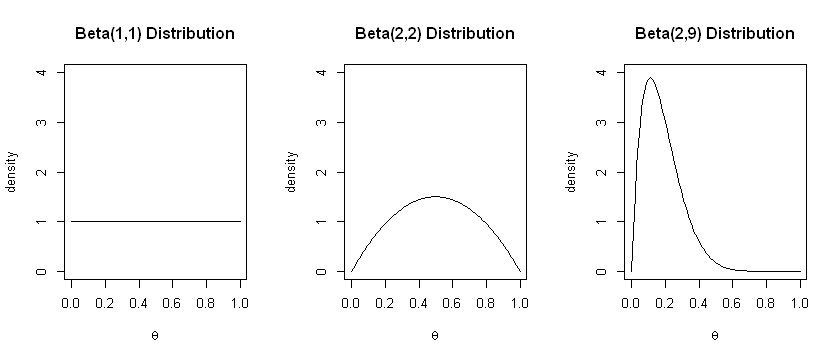

In [1]:
options(repr.plot.width=7, repr.plot.height=3)
theta <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(theta, dbeta(theta, 1, 1), type="l", main="Beta(1,1) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 2), type="l", main="Beta(2,2) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(theta, dbeta(theta, 2, 9), type="l", main="Beta(2,9) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

### Posterior 

Now, we apply Bayes theorem to obtain the posterior distribution using a $Beta(a,b)$ distribution for the prior:  

\begin{align}
\begin{split}
p(\theta \mid y) &= \frac{ p(\theta)\, p(y \mid \theta)} {\int  p(\theta)\,p(y \mid \theta)\,d\theta}\\
        & \propto  p(\theta)\, p(y \mid \theta)\\
       & =\frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1}  {n \choose y} \theta^y (1-\theta)^{n-y} \\
        & \propto \theta^{a-1} (1-\theta)^{b-1} \theta^y (1-\theta)^{n-y} \\
        & \propto \theta^{a+y-1} (1-\theta)^{b+n-y-1}
\end{split}
\end{align}


Now by inspection, we can see that this is in the form of a Beta distribution: we have that the posterior is proportional to $\theta^{a+y-1} (1-\theta)^{b+n-y-1}$. In other words, the posterior is $Beta(a+y, b+n-y).$ This distribution has mean given by: $\frac{a+y}{a+b+n}$ and variance $\frac{(a+y)(b+n-y)}{(a+b+n)^2(a+b+n+1)}.$  

Suppose the data we observe is $y=4$ successes out of a total of $10$ patients. Then: 

1. With the uniform $Beta(1,1)$ prior, our posterior is $Beta(5, 7)$. 
2. With the symmetrical $Beta(2, 2)$ prior, our posterior is $Beta(6, 8)$.
3. With the asymmetrical $Beta(2, 9)$ prior, our posterior is $Beta(6, 15)$. 

We plot the possible distibutions below: 

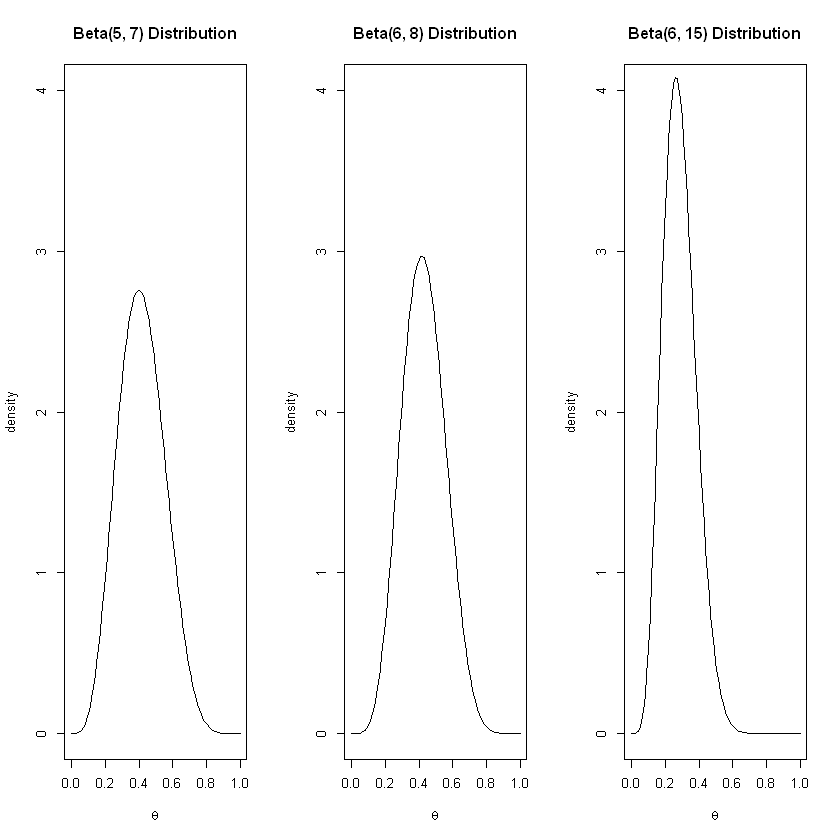

In [2]:
p <- seq(0, 1, 0.01)
par(mfrow=c(1,3))
plot(p, dbeta(p, 5, 7), type="l",  main="Beta(5, 7) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 8), type="l", main="Beta(6, 8) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")
plot(p, dbeta(p, 6, 15), type="l", main="Beta(6, 15) Distribution", ylim=c(0,4), xlab=expression(theta), ylab="density")

We can see that the uninformative prior leads to the posterior with the highest variance amongst the three. The narrow prior in the third example shifts the posterior distribution to the right. We can see that different choices of prior lead to different results. For this reason, it is often recommended to repeat analyses with different priors to see how much the results change: this is called *sensitivity analysis*. 

# Summarising Posteriors

We often display the posterior distribution graphically to get a sense of the information that we have about the parameter. However, other ways to summarize the distribution can be helpful.  

We may also wish to summarise the posterior distribution by a credible interval. Remember that a classical $100(1−\alpha)\%$ confidence interval is defined such that, if the data collection process is repeated again and again, then in the long run, $100(1 − \alpha)\%$of the confidence intervals formed would contain the true parameter value. Now, a Bayesian $100(1 − \alpha)\%$ credible interval is an interval which contains $100(1 − \alpha)\% $ of the posterior distribution of the parameter. There may be several different credible intervals such that the interval contains $100(1 − \alpha)\%$ of the distribution. The $100(1 -\alpha) \%$ Highest Posterior Density (HPD) interval ($\alpha \in (0,1)$) is the credible interval with the smallest range of values for $\theta$ (providing the posterior is concave). Algebraically, this is the region $[\theta_L,\theta_U]$ that contains $100( 1 - \alpha)\%$
of the probability, such that:

$P(\theta \in [
\theta_L,\theta_U])=1-\alpha$ such that for all $\theta_O \notin  [
\theta_L,\theta_U]$ and all  $\theta_I\in[
\theta_L,\theta_U],$ $p(\theta_O|y) <
p(\theta_I|y).$

In our previous example, when we used the asymmetrical $Beta(2, 9)$ prior, our posterior was $Beta(6, 15)$. The posterior mean is $\frac{6}{6+15}=0.286$. The $90\%$ HPDI is $(0.13, 0.44)$. We plot the distribution below and check that the area between these two values gives us 0.9. Now, note that the interval (0.144, 0.47) also gives us an area of 0.9, but this interval is wider. In a sense, the HPDI is the "tightest" interval so that the area under the posterior distribution is $\alpha$.




[1] 0.8970097

[1] 0.9049178

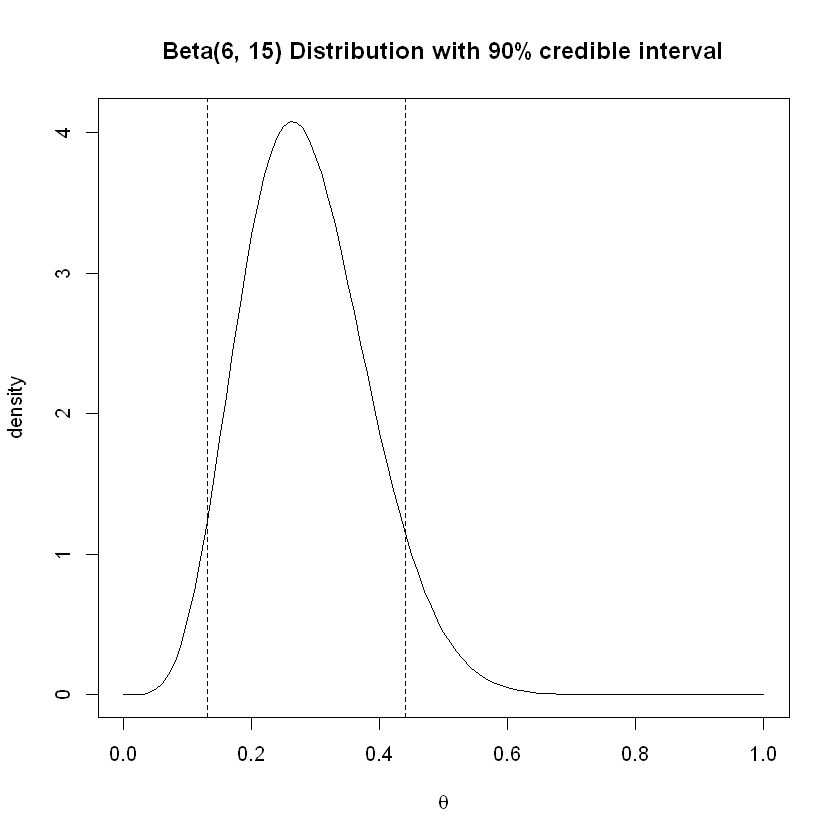

In [3]:
plot(p, dbeta(p, 6, 15), type="l", main="Beta(6, 15) Distribution with 90% credible interval",  xlab=expression(theta), ylab="density")
abline(v=0.44, lty="dashed")
abline(v=0.13,  lty="dashed")

#Area under the 90% HDPI
pbeta(0.44, 6, 15)-pbeta(0.13, 6, 15)

#The interval (0.47. 0.144) also a 90% credible interval 
pbeta(0.47, 6, 15)-pbeta(0.144, 6, 15)


# Prior Predictions

Before observing a quantity $y$, we can provide its predictive distribution by integrating out the unknown parameter,

$$p(y) = \int p(y|\theta) p(\theta) d\theta.$$

Predictions are useful in many settings, for example forecasting, cost-effectiveness models and design of
studies. In the trial described earlier in this section, we had 10 patients. Suppose we are interested in predicting the number of patients who will have a positive response. Recall that the Beta distribution is a suitable prior distribution for $\theta$, the proportion of positive responses. We have:

\begin{align}
	\theta &\sim \hbox{Beta}(a,b) \\
	y &\sim \hbox{Binomial}(\theta,n)
\end{align}

The exact predictive distribution $p(y)$ can be computed analytically and is known as the *Beta-Binomial* distribution. It has the complex form with three parameters,  number of trials $n$ and shape parameters, $a$ and $b$: 

\begin{align}
p(y) &=  \frac{ \Gamma (a+ b)}{ \Gamma (a) \Gamma (b) }  {n \choose y}  \frac{\Gamma (a+ y) \Gamma (b+n-y)}{\Gamma (a+b+n)} \\
\mathbb{E}(y) &=  n \frac{a}{a+b}
\end{align}


Given that we use the asymmetrical $Beta(2, 9)$ prior, our predictive distribution would be: 

\begin{equation}
p(y) =  \frac{ \Gamma (11)}{ \Gamma (2) \Gamma (9) }  {10 \choose y}  \frac{\Gamma (2+ y) \Gamma (19-y)}{\Gamma (21)},
\end{equation}

with $\mathbb{E}(y) =  10 \frac{2}{11} = 1.81$. So, before observing any data, we would predict around 2 patients to have a positive response out of 10.


## Posterior Prediction

Suppose that have observed $y$, and we want to predict future observations $z$, assuming that $z$ and $y$ are independent, conditional on $\theta$. The posterior predictive distribution for $z$ is given by,

\begin{align}
p(z|y) &= \int p(z, \theta | y) d \theta \\
     &= \int p(z |y, \theta) p(\theta |y ) d \theta \\ 
     & = \int p(z | \theta) p(\theta |y ) d \theta 
\end{align}

We are now weighting the probability distribution function for $z$ with our posterior belief after having observed $y$. 

For our example, we found that the posterior distribution $p(\theta |y ) $ is a Beta($a+y, b+n-y$) distribution. Thus our posterior predictive distribution is a Beta-binomial distribution with the number of trials $n_p$ and shape parameters $a+y, b+n-y$.   

Now, given that we use the asymmetrical $Beta(2, 9)$ prior, and then observe that $y=4$ patients out of $n=10$ had a successful result, and we wish to predict how many sucesses $z$ out of $n_p=20$ to expect, our posterior predictive distribution is a Beta-binomial with parameters $20$ and shape parameters $6$ and $15$. The expectation of this distribution is $\mathbb{E}(y) =  20 \frac{6}{21} \approx 6$ patients. 


# Conjugacy 

In the example with the Beta-Binomial model, we found that using the Beta distribution for the prior lead us to a posterior distribution that is also a Beta distribution. This is not a coincidence. Often, a particular distributional family is chosen for the prior, so that the resulting posterior distribution belongs to the same family. This is called a conjugate prior. Below are the conjugate priors for some common likelihood models. 

| Likelihood | Conjugate Prior | 
|:-|:-|
| Bernoulli | Beta | 
| Binomial | Beta |
| Poisson | Gamma |
| Geometric | Beta |
| Normal | Normal, Gamma and a few others |
| Exponential | Gamma |
| Gamma | Gamma |


# Exercise 

Suppose that there is an experiment where $n$ patients are asked to try different treatments each time they get a headache. We are interested in the number of different treatments a patient takes before they find one that is successful. For patient $i$, for $1 \leq i \leq n$, we denote by $y_i$ the number of treatments tried before the first success. Note that $\left\{ y_1, y_2, ..., y_n \right\}$ are a sample from a Geometric distribution: $y_i \sim Geom(\theta)$. The probability density function of a geometric distribution is: 

$$p(y | \theta) = \theta (\theta -1)^{y-1}$$

Suppose we wish to make inference on $\theta$. By specifying a Beta prior for $\theta$: $\theta \sim Beta(a, b)$, derive the posterior distribution of $\theta$. 

Solution: 


\begin{align}
\begin{split}
p(\theta \mid y_1, ..., y_n) 
        & \propto  p(\theta) \prod_{i=1}^n p(y_i \mid \theta)\\
               & \propto  \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1} \prod_{i=1}^n \theta (\theta -1)^{y-1}\\
       & \propto  \frac{\Gamma(a+ b)}{ \Gamma(a)\Gamma(b) } \theta^{a-1} (1-\theta)^{b-1}  \theta^n (\theta -1)^{\sum_{i=1}^n y_i-n}\\
       & \propto  \theta^{a+n-1} (\theta -1)^{\sum_{i=1}^n y_i -n +b-1}
\end{split}
\end{align}

This is a Beta distribution with parameters $a+n$ and $\sum_{i=1}^n y_i-n+b$.